In [43]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [25]:
df = pd.read_csv('DATA.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,name,sex,age,age_cat,race,juv_fel_count,decile_score,...,is_violent_recid,vr_charge_degree,vr_charge_desc,type_of_assessment,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1
0,0,0,1.00,miguel hernandez,Male,69,Greater than 45,Other,0,1,...,0,NaN,NaN,Risk of Recidivism,1,Low,Risk of Violence,1,Low,0
1,2,2,3.00,michael ryan,Male,31,25 - 45,Caucasian,0,5,...,0,NaN,NaN,Risk of Recidivism,5,Medium,Risk of Violence,2,Low,0
2,3,3,4.00,kevon dixon,Male,34,25 - 45,African-American,0,3,...,1,(F3),Felony Battery (Dom Strang),Risk of Recidivism,3,Low,Risk of Violence,1,Low,0
3,4,4,5.00,ed philo,Male,24,Less than 25,African-American,0,4,...,0,NaN,NaN,Risk of Recidivism,4,Low,Risk of Violence,3,Low,4
4,9,9,10.00,marcu brown,Male,23,Less than 25,African-American,0,8,...,0,NaN,NaN,Risk of Recidivism,8,High,Risk of Violence,6,Medium,1


In [26]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.dropna()

,Unnamed: 0,Unnamed: 0.1,id,name,sex,age,age_cat,race,juv_fel_count,decile_score,...,is_violent_recid,vr_charge_degree,vr_charge_desc,type_of_assessment,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1
2,3,3,4.00,kevon dixon,Male,34,25 - 45,African-American,0,3,...,1,(F3),Felony Battery (Dom Strang),Risk of Recidivism,3,Low,Risk of Violence,1,Low,0
12,24,24,25.00,bo bradac,Male,21,Less than 25,Caucasian,0,3,...,1,(F2),Aggrav Battery w/Deadly Weapon,Risk of Recidivism,3,Low,Risk of Violence,5,Medium,1
22,37,37,38.00,neil heckart,Male,31,25 - 45,Caucasian,0,5,...,1,(F1),Kidnapping (Facilitate Felony),Risk of Recidivism,5,Medium,Risk of Violence,4,Low,6
36,64,64,65.00,deandrae counts,Male,27,25 - 45,African-American,0,3,...,1,(F3),Felony Battery,Risk of Recidivism,3,Low,Risk of Violence,3,Low,8
39,73,73,74.00,victor moreno,Male,33,25 - 45,African-American,0,10,...,1,(M1),Battery,Risk of Recidivism,10,High,Risk of Violence,6,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,10952,10952,10953.00,damian wright,Male,25,25 - 45,Other,0,2,...,1,(M1),Battery,Risk of Recidivism,2,Low,Risk of Violence,4,Low,0
6533,10957,10957,10958.00,alberto espino,Male,44,25 - 45,Hispanic,0,1,...,1,(F3),Child Abuse,Risk of Recidivism,1,Low,Risk of Violence,2,Low,2
6535,10960,10960,10961.00,michael spetsieris,Male,36,25 - 45,Caucasian,0,2,...,1,(M1),Battery,Risk of Recidivism,2,Low,Risk of Violence,3,Low,1
6545,10978,10978,10979.00,bernard bellamy,Male,21,Less than 25,African-American,0,9,...,1,(F3),Battery Upon Detainee,Risk of Recidivism,9,High,Risk of Violence,8,High,1


In [27]:
df1 = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'id', 'name', 'age_cat', 'race', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_charge_degree', 'r_charge_desc', 'is_violent_recid', 'vr_charge_degree', 'vr_charge_desc', 'type_of_assessment', 'decile_score.1', 'score_text', 'v_type_of_assessment', 'decile_score', 'v_score_text', 'priors_count.1',])
df1.head()

,sex,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,v_decile_score
0,Male,69,0,0,0,0,13/08/2013 6:03,14/08/2013 5:41,1
1,Male,31,0,0,0,0,NaN,NaN,2
2,Male,34,0,0,0,0,26/01/2013 3:45,05/02/2013 5:36,1
3,Male,24,0,0,1,4,13/04/2013 4:58,14/04/2013 7:02,3
4,Male,23,0,1,0,1,NaN,NaN,6


In [28]:
df1=df1.replace(to_replace="Male",value="1")
df1=df1.replace(to_replace="Female",value="2")
df1.head()

,sex,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,v_decile_score
0,1,69,0,0,0,0,13/08/2013 6:03,14/08/2013 5:41,1
1,1,31,0,0,0,0,NaN,NaN,2
2,1,34,0,0,0,0,26/01/2013 3:45,05/02/2013 5:36,1
3,1,24,0,0,1,4,13/04/2013 4:58,14/04/2013 7:02,3
4,1,23,0,1,0,1,NaN,NaN,6


In [29]:
df1["c_jail_in"] = pd.to_datetime(df["c_jail_in"]).dt.strftime("%d%m%Y")
df1["c_jail_out"] = pd.to_datetime(df["c_jail_out"]).dt.strftime("%d%m%Y")
df1.head()

,sex,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,v_decile_score
0,1,69,0,0,0,0,13082013,14082013,1
1,1,31,0,0,0,0,NaN,NaN,2
2,1,34,0,0,0,0,26012013,02052013,1
3,1,24,0,0,1,4,13042013,14042013,3
4,1,23,0,1,0,1,NaN,NaN,6


In [30]:
df1.head()

,sex,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,v_decile_score
0,1,69,0,0,0,0,13082013,14082013,1
1,1,31,0,0,0,0,NaN,NaN,2
2,1,34,0,0,0,0,26012013,02052013,1
3,1,24,0,0,1,4,13042013,14042013,3
4,1,23,0,1,0,1,NaN,NaN,6


In [31]:
df1['c_jail_in'] = pd.to_numeric(df1['c_jail_in'])
df1['c_jail_out'] = pd.to_numeric(df1['c_jail_out'])
df1.dtypes

sex                 object
age                  int64
juv_fel_count        int64
juv_misd_count       int64
juv_other_count      int64
priors_count         int64
c_jail_in          float64
c_jail_out         float64
v_decile_score       int64
dtype: object

In [32]:
df2 = df1.dropna()
df2.head()

,sex,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,v_decile_score
0,1,69,0,0,0,0,13082013.00,14082013.00,1
2,1,34,0,0,0,0,26012013.00,2052013.00,1
3,1,24,0,0,1,4,13042013.00,14042013.00,3
6,1,44,0,0,0,0,30112013.00,12012013.00,1
7,1,41,0,0,0,14,18022014.00,24022014.00,2


In [11]:
df2.dtypes
#compare is recid and violent recid, take away fluff

sex                 object
age                  int64
juv_fel_count        int64
juv_misd_count       int64
juv_other_count      int64
priors_count         int64
c_jail_in          float64
c_jail_out         float64
v_decile_score       int64
dtype: object

In [33]:
target = "v_decile_score"

In [34]:
X = df2.drop("v_decile_score", axis=1)  # numpy array

y = df2[target]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

In [36]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test',  X_test.shape)
print('y_test',  y_test.shape)

X_train (7824, 8)
y_train (7824,)
X_test (1957, 8)
y_test (1957,)


In [37]:
my_model = LinearRegression()
my_model

LinearRegression()

In [38]:
my_model.fit(X=X_train, y=y_train)

LinearRegression()

In [39]:
predictions = my_model.predict(X_test)

In [40]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["v_decile_score"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,sex,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,v_decile_score,prediction
0,1523,1,29,0,0,0,8,17092014.00,28102014.00,2,4.93
1,9539,1,51,0,0,0,3,15022013.00,22022013.00,3,1.60
2,4466,1,24,0,0,0,3,11082013.00,11092013.00,4,4.93
3,10514,1,33,0,0,0,3,26112013.00,21032014.00,4,3.81
4,102,2,31,0,0,0,2,11072014.00,11082014.00,2,3.38


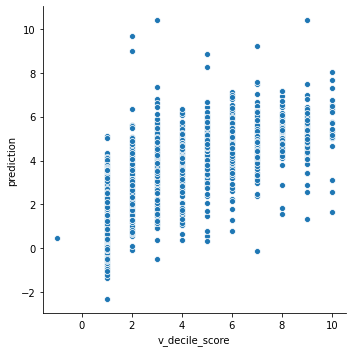

In [41]:
sns.relplot(x="v_decile_score", y="prediction", data=X, kind="scatter")

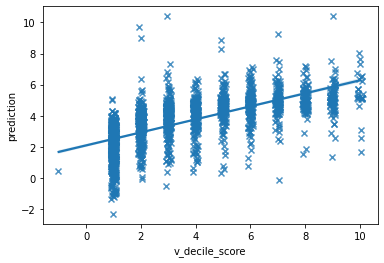

In [42]:
sns.regplot(x="v_decile_score", y="prediction", data=X, x_jitter=.1, marker='x')

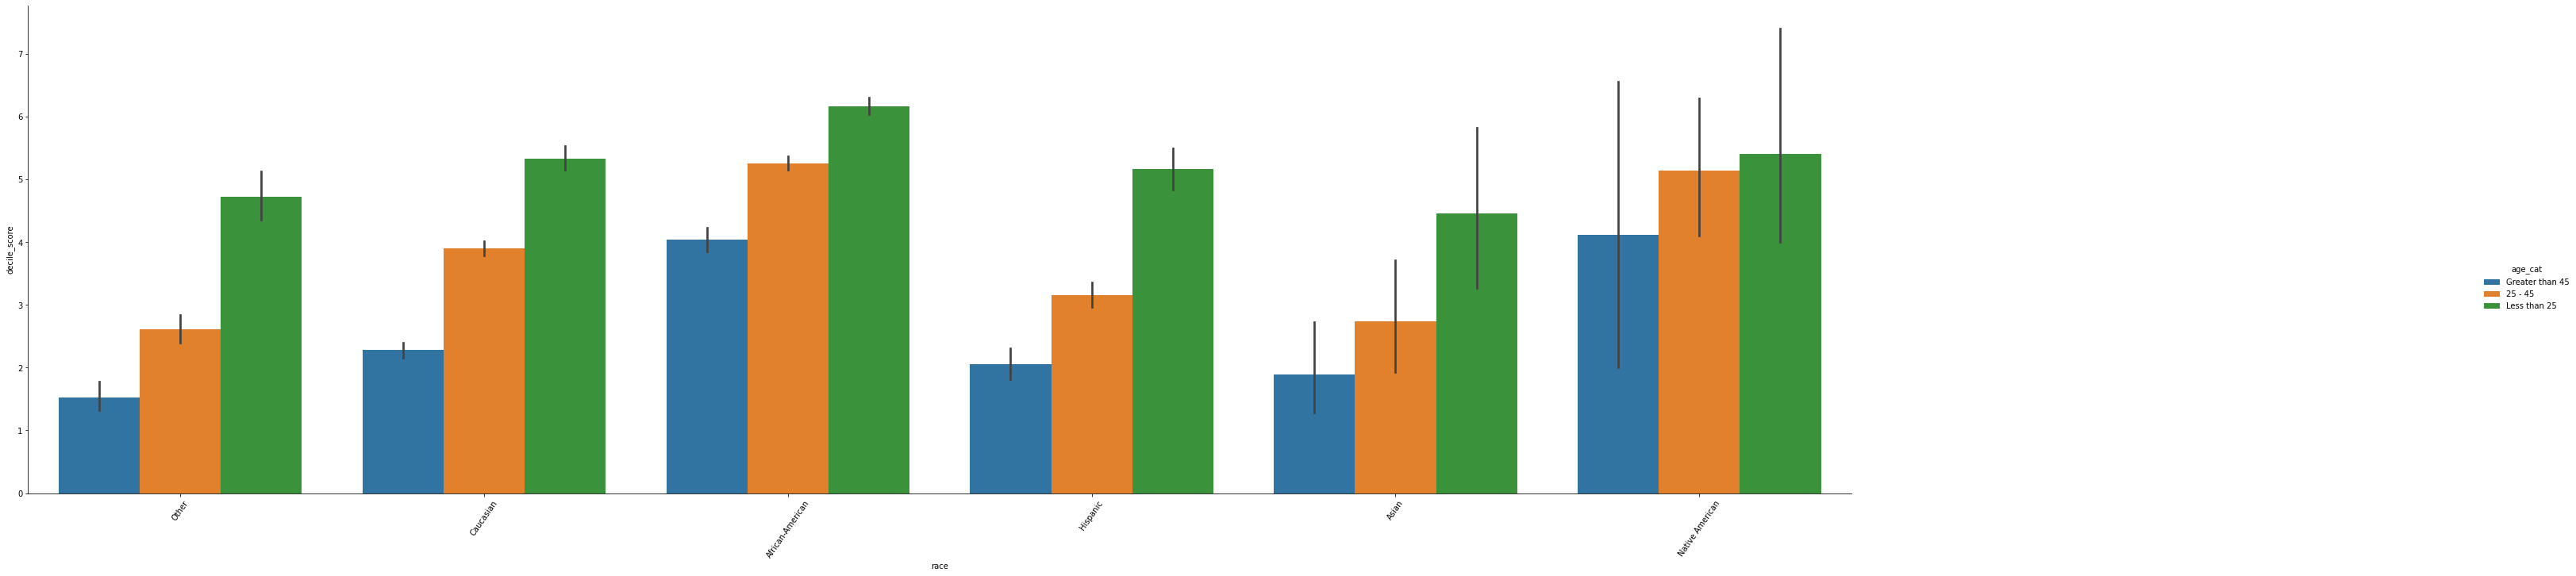

In [64]:
g = sns.catplot(x="race", y="decile_score", hue="age_cat", kind="bar", data=df)
g.fig.set_figwidth(50)
g.fig.set_figheight(10)
g.set_xticklabels(rotation=55)